In [46]:
import os
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt

In [50]:
dir = 'C:\\Users\\wj2002\\Dropbox (Heriot-Watt University Team)\\RES_EPS_Quantum_Photonics_Lab\\Experiments\\Current Experiments\\Broadband telecom quantum memories\\2022_PrYVO_Spectroscopy\\Infrared\\0_1%_SHB'
folder = '20221207'

In [55]:
plot_data=['SHB12713.CSV','SHB12714.CSV','SHB12715.CSV']
path_data_0= dir + '\\' + folder + '\\' + plot_data[0]
path_data_1= dir + '\\' + folder + '\\' + plot_data[1]
path_ref = dir + '\\' + folder + '\\' + plot_data[2]
data_0=pd.read_csv(path_data_0)
data_0=data_0.to_numpy() 

data_1=pd.read_csv(path_data_1)
data_1=data_1.to_numpy() 

ref=pd.read_csv(path_ref)
ref=ref.to_numpy() 


#find the background
t_start=3e-3
t_stop=4e-3
t_start_diff=np.absolute(ref[:,0]-t_start)
t_start_pos=np.argmin(t_start_diff)
t_stop_diff=np.absolute(ref[:,0]-t_stop)
t_stop_pos=np.argmin(t_stop_diff)
data_0_transmission_background=np.average(data_0[t_start_pos:t_stop_pos,2])
data_0_reflection_background=np.average(data_0[t_start_pos:t_stop_pos,3])
data_1_transmission_background=np.average(data_1[t_start_pos:t_stop_pos,2])
data_1_reflection_background=np.average(data_1[t_start_pos:t_stop_pos,3])
ref_transmission_background=np.average(ref[t_start_pos:t_stop_pos,2])
ref_reflection_background=np.average(ref[t_start_pos:t_stop_pos,3])

#correct the data with the background and then normalise the transmitted data with the reflected signals
normalised_data_0=(data_0[:,2]-data_0_transmission_background)/(data_0[:,3]-data_0_reflection_background)
normalised_data_1=(data_1[:,2]-data_1_transmission_background)/(data_1[:,3]-data_1_reflection_background)
normalised_ref=(ref[:,2]-ref_transmission_background)/(ref[:,3]-ref_reflection_background)

C:\Users\wj2002\AppData\Local\Temp\ipykernel_9532\3958120184.py:31: RuntimeWarning: invalid value encountered in log
  ax1.plot(data_0[:,0]/reading_pulse_duration*frequency_sweeping/1e6, np.log(normalised_ref/normalised_data_0), 'r-', label='Switching OFF burning')
C:\Users\wj2002\AppData\Local\Temp\ipykernel_9532\3958120184.py:32: RuntimeWarning: invalid value encountered in log
  ax1.plot(data_0[:,0]/reading_pulse_duration*frequency_sweeping/1e6, np.log(normalised_ref/normalised_data_1), 'b-', label='Switching ON burning')


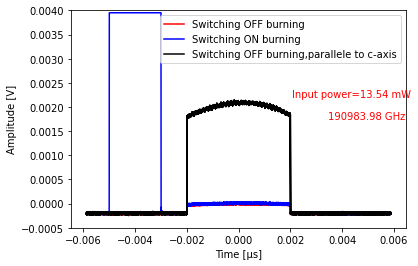

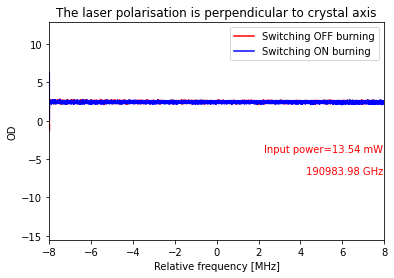

In [56]:

reading_pulse_duration=4e-3 
frequency_sweeping=16e6
laser_frequency=190983.98 # Unit:THz
Inputpower=13.54 # Unit:mW

fig, ax0 = plt.subplots()
ax0.plot(data_0[:,0], data_0[:,2], 'r-', label='Switching OFF burning')
ax0.plot(data_1[:,0], data_1[:,2], 'b-', label='Switching ON burning')
ax0.plot(ref[:,0], ref[:,2], 'k-', label='Switching OFF burning' + ',' + 'parallele to c-axis')
ax0.legend(loc='upper right')
ax0.set_xlabel('Time [\u03BCs]')
ax0.set_ylabel('Amplitude [V]')
ax0.set_ylim(-0.0005,0.004)
#ax0.set_title('The laser polarisation is perpendicular to crystal axis')
#ax0.set_title('The laser polarisation is perpendicular to crystal axis')
fig.patch.set_facecolor('white')
ax0.annotate('Input power='+"{:.2f}".format(Inputpower)+' mW',
            xy=(1.075, 0.5), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')
ax0.annotate("{:.2f}".format(laser_frequency)+' GHz',
            xy=(1.057, 0.4), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')

fig, ax1 = plt.subplots()
ax1.plot(data_0[:,0]/reading_pulse_duration*frequency_sweeping/1e6, np.log(normalised_ref/normalised_data_0), 'r-', label='Switching OFF burning')
ax1.plot(data_0[:,0]/reading_pulse_duration*frequency_sweeping/1e6, np.log(normalised_ref/normalised_data_1), 'b-', label='Switching ON burning')
ax1.legend()
ax1.set_xlabel('Relative frequency [MHz]')
ax1.set_ylabel('OD')
ax1.set_xlim(-8,8)
#ax1.set_title('The laser polarisation is perpendicular to crystal axis')
ax1.set_title('The laser polarisation is perpendicular to crystal axis')
fig.patch.set_facecolor('white')
ax1.annotate('Input power='+"{:.2f}".format(Inputpower)+' mW',
            xy=(1.057, 0.3), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')
ax1.annotate("{:.2f}".format(laser_frequency)+' GHz',
            xy=(1.057, 0.2), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',color='r')
fig.patch.set_facecolor('white')